# Average Hash

Based on [this blog post](http://hackerfactor.com/blog/index.php%3F/archives/432-Looks-Like-It.html) I am going to implement the Average Hash function in python.

The basic steps of the algorithm are as follows:
1. Reduce size of image to 8x8
2. Convert to Grayscale
3. Compute mean luminocity
4. For each of the 64 pixels, test whether it is above or below the mean value.
5. Output this value as a 64-bit integer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

## Step 0. Import image

In [2]:
rawimg = imread("images/Alyson_Hannigan_200512.jpg")

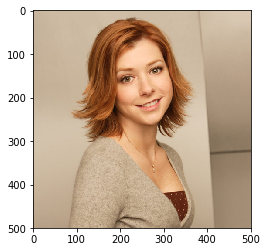

In [3]:
plt.imshow(rawimg)

## Step 1. Resize Image

In [4]:
scaledimg = resize(rawimg, (8, 8), anti_aliasing=True, mode='constant')

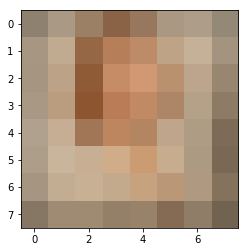

In [5]:
plt.imshow(scaledimg)

## Step 2. Convert to Grayscale

In [6]:
grayimg = rgb2gray(scaledimg)

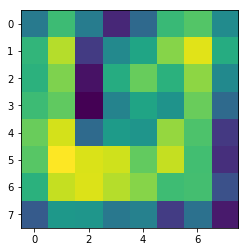

In [7]:
plt.imshow(grayimg)

Note: pyplot adds color to grayscale plots to make the data more visible.

## Step 3. Calculate Mean Luminocity

In [8]:
lavg = grayimg.mean()
lavg

0.5763047970281865

## Step 4. Test each pixel against Mean Luminocity

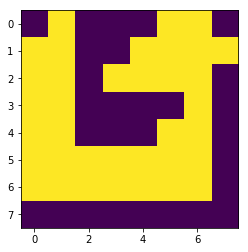

In [9]:
compbits = (grayimg > lavg) * 1
np.shape(compbits)
plt.imshow(compbits)

## Step 5. Generate Hash

In [10]:
hashbits = np.ravel(compbits)
np.shape(hashbits)

(64,)

In [11]:
def bool2int(x):
    y = 0
    for i,j in enumerate(x):
        y += j<<i
    return y

In [12]:
hash = bool2int(hashbits)
format(hash, "x")

'7f7f63437bf362'

## Conclusion:

I don't know why my output is different from the example in the blog post. The post does not provide code examples and the language is too vague to worry too much about it right now. I don't expect it to be too important on the exact behaviour of each part of the algorithm. I will experiment with this after implementing more algorithms and collecting a dataset.